# Settings, Directory Specs, and Imports

In [1]:
# 0 = no streamlit
# 1 = test user inputs
# 2 = run in streamlit
streamlit_status = 0
#file_name_pickle_read = 'model_2020_06_06_1105.pickle'
do_plots = 1

dir_read = '/Users/rachellehorwitz/Documents/ViTalErt/data/filtered05/'
#dir_read = '/Users/rachellehorwitz/Documents/VTAlert/over18_eicu/'

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import streamlit as st
import pickle
from datetime import datetime
import pyprojroot


matplotlib.rcParams.update({'font.size': 22})

# Function Definitions

In [2]:
def now_to_str():
    now = str(datetime.now())
    return now[0:4] + '_' + now[5:7] + '_' + now[8:10] + '_' + now[11:13] + now[14:16]

# Defining X and y

In [3]:
Xy = pd.read_csv('/Users/rachellehorwitz/Documents/ViTalErt/notebooks/Xy_2020_06_10_1425.csv')
Xy = Xy.set_index('patientunitstayid')
y = Xy.pop('label')
X = Xy.copy()
X.columns

Index(['age', 'admissionweight', 'admissionheight', 'bmi', 'gender_Female',
       'ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian',
       'ethnicity_Hispanic', 'ethnicity_Native American',
       'ethnicity_Other/Unknown', 'unitstaytype_admit', 'unitstaytype_readmit',
       'unitstaytype_transfer', 'verbal', 'motor', 'eyes', 'thrombolytics',
       'aids', 'hepaticfailure', 'lymphoma', 'metastaticcancer', 'leukemia',
       'immunosuppression', 'cirrhosis', 'activetx', 'ima', 'midur',
       'ventday1', 'oobventday1', 'oobintubday1', 'diabetes', 'visitnumber',
       'heartrate'],
      dtype='object')

In [4]:
X.head()

,age,admissionweight,admissionheight,bmi,gender_Female,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,...,cirrhosis,activetx,ima,midur,ventday1,oobventday1,oobintubday1,diabetes,visitnumber,heartrate
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
141168,70,84.3,152.4,36.295906,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,125.052830
141194,68,73.9,180.3,22.732803,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,86.860627
141197,71,102.1,162.6,38.617545,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,97.307692
141203,77,70.2,160.0,27.421875,1,0,0,1,0,0,...,0,1,0,0,1,1,0,1,1,91.543554
141208,25,95.3,172.7,31.952749,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,77.817460


In [5]:
y.head()

patientunitstayid
141168    0
141194    0
141197    0
141203    0
141208    0
Name: label, dtype: int64

In [6]:
# from sklearn.metrics import precision_score

# %matplotlib qt


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# scaler = StandardScaler()
# X_train_sc = scaler.fit_transform(X_train)
# X_test_sc = scaler.transform(X_test)

# logisticRegr_sc = LogisticRegression(class_weight='balanced')
# logisticRegr_sc.fit(X_train_sc, y_train)

# yhat_logisticRegr_sc = logisticRegr_sc.predict(X_test_sc)
# prob_logisticRegr_sc = logisticRegr_sc.predict_proba(X_test_sc)[:,1]

# #lprob_sc = logisticRegr_sc.predict_log_proba(X_test)[:,1]

# scores_sc = logisticRegr_sc.score(X_test_sc, y_test)
# print(scores_sc)
# print('F1 score is: ' + str(f1_score(y_test, yhat_logisticRegr_sc)))

# # # Print baseline accuracy
# # N0_bl = patient[patient['label']==0].shape[0]
# # N1_bl = patient[patient['label']==1].shape[0]
# # print('{:d} patients in negative class'.format(N0_bl))
# # print('{:d} patients in positive class'.format(N1_bl))
# # print('If you predict 0 all the time, accuracy is {:.5f}%'.format(N0_bl/(N0_bl+N1_bl)))

# cm = confusion_matrix(list(y_test), yhat_logisticRegr_sc)
# plot_confusion_matrix(logisticRegr_sc, X_test_sc, list(y_test))
# plot_confusion_matrix(logisticRegr_sc, X_test_sc, list(y_test),  normalize='true')

# # ROC curve (https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
# noskill_probs = [0 for _ in range(len(y_test))]
# noskill_auc = roc_auc_score(y_test, noskill_probs)
# logisticRegr_auc = roc_auc_score(y_test, prob_logisticRegr_sc)
# print('No Skill: ROC AUC=%.3f' % (noskill_auc))
# print('Logistic: ROC AUC=%.3f' % (logisticRegr_auc))
# ns_fpr, ns_tpr, _ = roc_curve(y_test, noskill_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, prob_logisticRegr_sc)

# plt.figure()
# # plot the roc curve for the model
# plt.plot(ns_fpr, ns_tpr, linestyle='--')
# plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regr.')
# # axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # show the legend
# plt.legend()
# # show the plot
# plt.show()

# print('prob_sc:  min = ' + str(np.min(prob_logisticRegr_sc)))
# print('\t    max = ' + str(np.max(prob_logisticRegr_sc)))

# # Get feature weights and put into dataframe
# mydict = {'feature': X_train.columns, 'coef': list(logisticRegr_sc.coef_.reshape(-1,1).flatten())}
# features_weights = pd.DataFrame(mydict)
# features_weights = features_weights.assign(abs_weight=np.abs(features_weights['coef']))
# features_weights.head()
# print('accuracy is ' + str(scores_sc))
# print('precision is ' + str(precision_score(y_test, yhat_logisticRegr_sc)))

In [7]:
# yhat_logisticRegr_sc

In [8]:
# cm

In [9]:
# np.logspace(-4,4,10)

In [10]:
def grid_search_wrapper(clf, X_train_sc, y_train, X_test_sc, y_test):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
#     grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
#                            cv=skf, return_train_score=True, n_jobs=-1)
    
#     scorers = {
#     'precision_score': make_scorer(precision_score),
#     'recall_score': make_scorer(recall_score),
#     'accuracy_score': make_scorer(accuracy_score)
#     }
    
#     param_grid = {'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20)}
    
    
    
    
    hyperparam_grid = {'penalty': ['l1', 'l2'], 'C': np.logspace(-6, 3, 10), 'fit_intercept': [True, False]}
    #GridSearchCV(clf, param, scoring='f1_score',refit=True,cv=10)
    
    
    grid_search = GridSearchCV(clf, scoring='f1', param_grid= hyperparam_grid, refit=True,
                           cv=skf, return_train_score=True, n_jobs=4)
    grid_search.fit(X_train_sc, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test_sc)

    print('Best params for f1')
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Logistic Regression optimized')
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search, y_pred

In [11]:

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train_sc, y_train)

grid_search_clf, y_pred = grid_search_wrapper(clf, X_train_sc, y_train, X_test_sc, y_test)
f1_score(y_test, y_pred)
# yhat_logisticRegr_sc = logisticRegr_sc.predict(X_test_sc)
# prob_logisticRegr_sc = logisticRegr_sc.predict_proba(X_test_sc)[:,1]



Best params for f1
{'C': 0.0001, 'fit_intercept': True, 'penalty': 'l2'}

Confusion matrix of Logistic Regression optimized
     pred_neg  pred_pos
neg     19910      9254
pos        28        62


0.013183074633212843

In [12]:
grid_search_clf.predict_proba(X_test_sc)[:,1]

array([0.32804703, 0.59624074, 0.47660781, ..., 0.35201045, 0.26061886,
       0.28511005])

In [13]:
grid_search_clf.predict_proba(X_test_sc)[:,1].min()

0.04476900829117379

In [14]:
grid_search_clf.predict_proba(X_test_sc)[:,1].max()

0.9494607452797603

In [15]:
clf_w_best_params = LogisticRegression(class_weight='balanced', C=0.0001, fit_intercept=True)
clf_w_best_params.fit(X_train_sc, y_train)
y_pred = clf_w_best_params.predict(X_test_sc)
print('accuracy is ' + str(accuracy_score(y_test, y_pred)))
print('precision is ' + str(precision_score(y_test, y_pred)))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.686


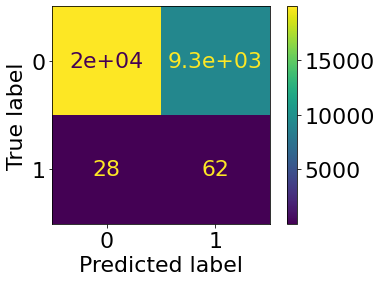

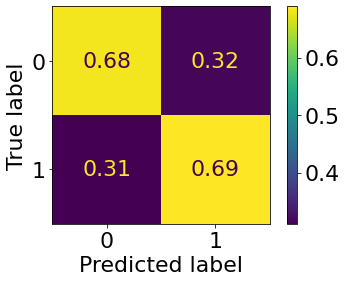

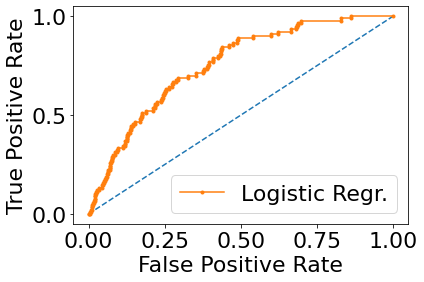

In [23]:
cm = confusion_matrix(list(y_test), y_pred)
plot_confusion_matrix(clf_w_best_params, X_test_sc, list(y_test))
plot_confusion_matrix(clf_w_best_params, X_test_sc, list(y_test),  normalize='true')

# ROC curve (https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
noskill_probs = [0 for _ in range(len(y_test))]
noskill_auc = roc_auc_score(y_test, noskill_probs)
logisticRegr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (noskill_auc))
print('Logistic: ROC AUC=%.3f' % (logisticRegr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, noskill_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clf_w_best_params.predict_proba(X_test_sc)[:,1])

plt.figure()
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regr.')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [22]:
y_pred.shape

(29254,)

In [19]:
# Get feature weights and put into dataframe
mydict = {'feature': X_train.columns, 'coef': list(clf_w_best_params.coef_.reshape(-1,1).flatten())}
features_weights = pd.DataFrame(mydict)
features_weights = features_weights.assign(abs_weight=np.abs(features_weights['coef']))
features_weights


,feature,coef,abs_weight
0,age,0.127438,0.127438
1,admissionweight,0.085473,0.085473
2,admissionheight,0.011671,0.011671
3,bmi,0.071212,0.071212
4,gender_Female,0.014983,0.014983
5,ethnicity_African American,0.054780,0.054780
6,ethnicity_Asian,-0.063041,0.063041
7,ethnicity_Caucasian,0.010358,0.010358
8,ethnicity_Hispanic,0.017740,0.017740
9,ethnicity_Native American,-0.020662,0.020662
